In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!pwd

/home/luca/Desktop/uni/master/lab/distributed_systems/ds/learner-service/src/notebooks


In [70]:
losses = [
    pd.read_csv("../../predator_losses.txt", header=None),
    pd.read_csv("../../prey_losses.txt", header=None),
]

In [71]:
len(losses[0][0])

26060

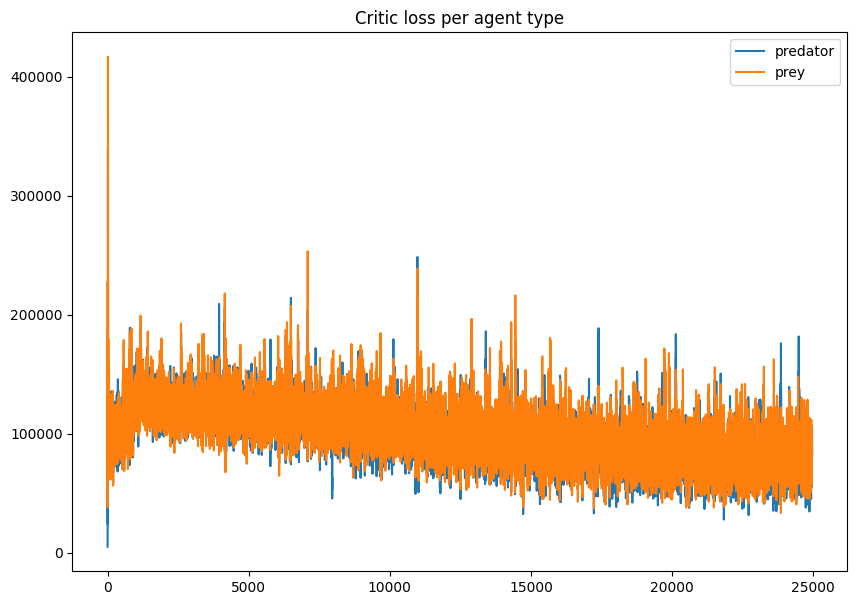

In [72]:
plt.figure(figsize=(10, 7))

for loss in losses:
    means = [subarr for subarr in loss[0][1100:]]
    plt.plot(range(len(means)), means)

plt.title("Critic loss per agent type")
plt.legend(["predator", "prey"])
plt.show()